# Computing Long-Duration Gamma-Ray Bursts from Double Compact Object Populations 🌌

If you haven't done so yet, export the path POSYDON environment variables.

In [1]:
%env PATH_TO_POSYDON=/Users/simone/Google Drive/github/POSYDON-public/
%env PATH_TO_POSYDON_DATA=/Volumes/T7/

env: PATH_TO_POSYDON=/Users/simone/Google Drive/github/POSYDON-public/
env: PATH_TO_POSYDON_DATA=/Volumes/T7/


We will use the same BBH population as in the `Analyzing Merging BBH Populations: Rates & Observations` tutorial. To compute long-duration gamma-ray burst (LGRB) rates associated with the formation of merging BBHs, we will specity the following parameters to the `MODEL` parameters of the Synthetic Population class.

In [2]:
import os
from config import PATH_TO_POSYDON_DATA
from posydon.popsyn.synthetic_population import SyntheticPopulation

# cosmological model parameters for the rate calculation
MODEL = {
    'delta_t' : 100, # Myr
    'SFR' : 'IllustrisTNG',
    'sigma_SFR' : None,
    'Z_max' : 1.,
    'Zsun' : 0.0142,
    # LGRB parameters
    'compute_GRB_properties' : True,
    'GRB_beaming' : 'Goldstein+15',
    'GRB_efficiency' : 0.01,
    'E_GRB_iso_min' : 1e51,
}

pop = SyntheticPopulation('./population_params.ini', verbose=True, MODEL=MODEL)
path = os.path.join(PATH_TO_POSYDON_DATA, "POSYDON_data/tutorials/population-synthesis/example/")
pop.load_pop(os.path.join(path,'BBH_population.h5'))

# generate the BBH synthetic population
pop.get_dco_at_formation(S1_state='BH', S2_state='BH', 
                         oneline_cols=['S1_natal_kick_array_0', 'S2_natal_kick_array_0'],
                         formation_channels=True)

# we can save the synthetic population
pop.save_synthetic_pop(os.path.join(path,'BBH_synthetic_population.h5'))
# pop.load_synthetic_pop(os.path.join(path,'BBH_synthetic_population.h5'))

cols = ['metallicity','time','t_delay','S1_state','S2_state','S1_mass','S2_mass',
        'S1_spin','S2_spin', 'S1_E_GRB_iso', 'S2_E_GRB_iso',
        'orbital_period','eccentricity', 'channel']
pop.df_synthetic[cols]

Population successfully loaded!
Computing formation channels...


/Users/simone/Google Drive/github/POSYDON-public/posydon/popsyn/synthetic_population.py:804: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'ZAMS_oDoubleCE1_CC1_redirect_CC2_CO_contact_END' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  self.df_oneline.loc[index,'channel_debug'] = formation_channel
/Users/simone/Google Drive/github/POSYDON-public/posydon/popsyn/synthetic_population.py:808: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'ZAMS_oDoubleCE1_CC1_CC2_END' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  self.df_oneline.loc[index,'channel'] = formation_channel
/Users/simone/Google Drive/github/POSYDON-public/posydon/popsyn/GRB.py:20: UserWarning: We only consider GRBs with isotropic equivalent energy larger than 1e+51 erg!
  warnings.warn("We only conside

Synthetic population successfully saved!


/Users/simone/Google Drive/github/POSYDON-public/posydon/popsyn/synthetic_population.py:451: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->Index(['state', 'event', 'step_names', 'S1_state', 'S2_state', 'channel'], dtype='object')]

  self.df_synthetic.to_hdf(path, key='history')


,metallicity,time,t_delay,S1_state,S2_state,S1_mass,S2_mass,S1_spin,S2_spin,S1_E_GRB_iso,S2_E_GRB_iso,orbital_period,eccentricity,channel
0,0.01420,4.027170,2913.863804,BH,BH,13.120462,12.911080,0.079649,0.064849,0.000000e+00,0.000000e+00,1.611464,0.048133,ZAMS_oDoubleCE1_CC1_CC2_END
1,0.01420,4.027170,1500.583774,BH,BH,13.120462,12.911080,0.079649,0.063991,0.000000e+00,0.000000e+00,1.279098,0.123592,ZAMS_oDoubleCE1_CC1_CC2_END
2,0.01420,4.849573,662.821800,BH,BH,10.330899,9.888130,0.286911,0.249267,3.210409e+51,2.637513e+49,0.817643,0.165775,ZAMS_oDoubleCE1_CC1_CC2_END
3,0.01420,4.544886,845.424610,BH,BH,11.355246,10.251920,0.320931,0.298164,1.240025e+52,1.441788e+52,1.108194,0.379450,ZAMS_oDoubleCE1_CC1_CC2_END
4,0.01420,4.530889,620.499837,BH,BH,11.436823,10.900538,0.190982,0.167996,6.061384e+48,1.611669e+48,0.830194,0.107165,ZAMS_oDoubleCE1_CC1_CC2_END
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30751,0.00639,4.585168,128.572655,BH,BH,13.380617,12.935158,0.467285,0.458164,2.823712e+53,1.243931e+53,0.507305,0.089335,ZAMS_oDoubleCE1_CC1_CC2_END
30752,0.00639,5.751690,68.017543,BH,BH,10.018834,9.020831,0.719064,0.694536,1.934640e+54,4.966308e+52,0.333537,0.155820,ZAMS_oDoubleCE1_CC1_CC2_END
30753,0.00639,6.061904,88.863012,BH,BH,20.971757,9.843552,0.068179,0.698055,0.000000e+00,7.845341e+53,0.468303,0.129531,ZAMS_CC1_oRLO2_oCE2_CC2_END
30754,0.00639,5.290004,95.405272,BH,BH,11.456069,11.171652,0.578478,0.595531,7.876427e+52,9.625162e+53,0.414186,0.102238,ZAMS_oDoubleCE1_CC1_CC2_END


Similar to the `Analyzing Merging BBH Populations: Rates & Observations` we compute the BBH merger rate density to obtain the BBH intrinsic population.

In [3]:
pop.get_dco_merger_rate_density()
pop.save_intrinsic_pop(os.path.join(path,'BBH_intrinsic_population.h5'))
# pop.load_intrinsic_pop(os.path.join(path,'BBH_intrinsic_population.h5'))
pop.df_dco_intrinsic[cols]

100%|██████████| 14/14 [00:26<00:00,  1.91s/it]


DCO merger rate density in the local Universe (z=0.00): 118.48 Gpc^-3 yr^-1
Intrinsic population successfully saved!


,metallicity,time,t_delay,S1_state,S2_state,S1_mass,S2_mass,S1_spin,S2_spin,S1_E_GRB_iso,S2_E_GRB_iso,orbital_period,eccentricity,channel
0,0.014200,6.205715,4.287125e-08,BH,BH,12.260188,12.183039,0.050168,8.244612e-04,0.0,0.000000e+00,326.580311,0.999994,ZAMS_CC1_oRLO2_CC2_END
1,0.014200,4.705799,9.754266e-01,BH,BH,12.850735,20.143346,0.027546,5.791334e-17,0.0,0.000000e+00,2377.230212,0.999817,ZAMS_CC1_CC2_END
2,0.014200,8.187239,2.075700e+00,BH,BH,8.314851,8.315119,0.100591,6.554160e-03,0.0,0.000000e+00,38.651550,0.996045,ZAMS_oRLO1-reverse_CC1_CC2_END
3,0.014200,6.647572,2.472628e+01,BH,BH,9.826765,9.853595,0.032525,2.400078e-02,0.0,0.000000e+00,14.240625,0.980550,ZAMS_oRLO1-contact_CC1_CC2_END
4,0.014200,6.676527,1.680554e+01,BH,BH,20.974131,12.500642,0.000531,4.772162e-04,0.0,0.000000e+00,696.487802,0.998932,ZAMS_CC1_oRLO2_CC2_END
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2888053,0.000001,9.558857,1.547540e+03,BH,BH,12.404415,17.186149,0.353053,1.279050e-01,0.0,4.585059e+52,1.368867,0.072070,ZAMS_oRLO1_CC1_oRLO2_CC2_END
2888054,0.000001,5.679476,5.173339e+02,BH,BH,31.263586,34.303592,0.127590,1.671062e-01,0.0,6.742460e+52,1.495336,0.003466,ZAMS_oRLO1-contact_CC1_oRLO2_CC2_END
2888055,0.000001,6.972682,1.105689e+04,BH,BH,22.020038,17.356224,0.156907,1.396343e-01,0.0,2.457570e+52,3.686468,0.234744,ZAMS_oRLO1_CC1_oRLO2_CC2_END
2888056,0.000001,6.442639,1.310371e+04,BH,BH,21.311099,36.473143,0.104700,1.194260e-01,0.0,9.105078e+53,4.546062,0.059527,ZAMS_oRLO1_CC1_oRLO2_CC2_END


Let's compute the LGRB rate density as a function of redshift.

In [4]:
pop.get_grb_rate_density() # if already computed use load_data=True
pop.save_intrinsic_pop(os.path.join(path,'LGRB_intrinsic_population.h5'), pop='GRB')
#pop.load_intrinsic_pop(os.path.join(path,'LGRB_intrinsic_population.h5'), pop='GRB')
pop.df_grb_intrinsic[cols]

100%|██████████| 14/14 [00:33<00:00,  2.39s/it]


GRB (beamed) rate density in the local Universe (z=0.00): 0.35 Gpc^-3 yr^-1
Intrinsic population successfully saved!


,metallicity,time,t_delay,S1_state,S2_state,S1_mass,S2_mass,S1_spin,S2_spin,S1_E_GRB_iso,S2_E_GRB_iso,orbital_period,eccentricity,channel
0,0.014200,4.849573,662.821800,BH,BH,10.330899,9.888130,0.286911,0.249267,3.210409e+51,NaN,0.817643,0.165775,ZAMS_oDoubleCE1_CC1_CC2_END
1,0.014200,4.544886,845.424610,BH,BH,11.355246,10.251920,0.320931,0.298164,1.240025e+52,NaN,1.108194,0.379450,ZAMS_oDoubleCE1_CC1_CC2_END
2,0.014200,4.850661,336.796977,BH,BH,10.415160,9.751447,0.340653,0.299044,9.060711e+52,NaN,0.612968,0.064357,ZAMS_oDoubleCE1_CC1_CC2_END
3,0.014200,4.865192,671.702835,BH,BH,10.427303,9.478635,0.350639,0.312924,3.486785e+52,NaN,0.825793,0.195932,ZAMS_oDoubleCE1_CC1_CC2_END
4,0.014200,5.207981,247.878920,BH,BH,9.514654,9.216414,0.516591,0.498734,1.731335e+53,NaN,0.521422,0.058677,ZAMS_oDoubleCE1_CC1_CC2_END
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137975,0.000001,9.558857,1547.539864,BH,BH,12.404415,17.186149,0.353053,0.127905,NaN,4.585059e+52,1.368867,0.072070,ZAMS_oRLO1_CC1_oRLO2_CC2_END
3137976,0.000001,5.679476,517.333924,BH,BH,31.263586,34.303592,0.127590,0.167106,NaN,6.742460e+52,1.495336,0.003466,ZAMS_oRLO1-contact_CC1_oRLO2_CC2_END
3137977,0.000001,6.972682,11056.893673,BH,BH,22.020038,17.356224,0.156907,0.139634,NaN,2.457570e+52,3.686468,0.234744,ZAMS_oRLO1_CC1_oRLO2_CC2_END
3137978,0.000001,6.442639,13103.712599,BH,BH,21.311099,36.473143,0.104700,0.119426,NaN,9.105078e+53,4.546062,0.059527,ZAMS_oRLO1_CC1_oRLO2_CC2_END


Let's visualise the BBH and LGRB rate densities as a function of redshift and compare it with GWTC-3 annd Perley+16 observational constrains.
- `channels` allows you to display the contribution of each formation channel to the total BBH and LGRB rate density.
- `grb_components` allows you to display the LGRB contribution from the primary star or the secondary star.

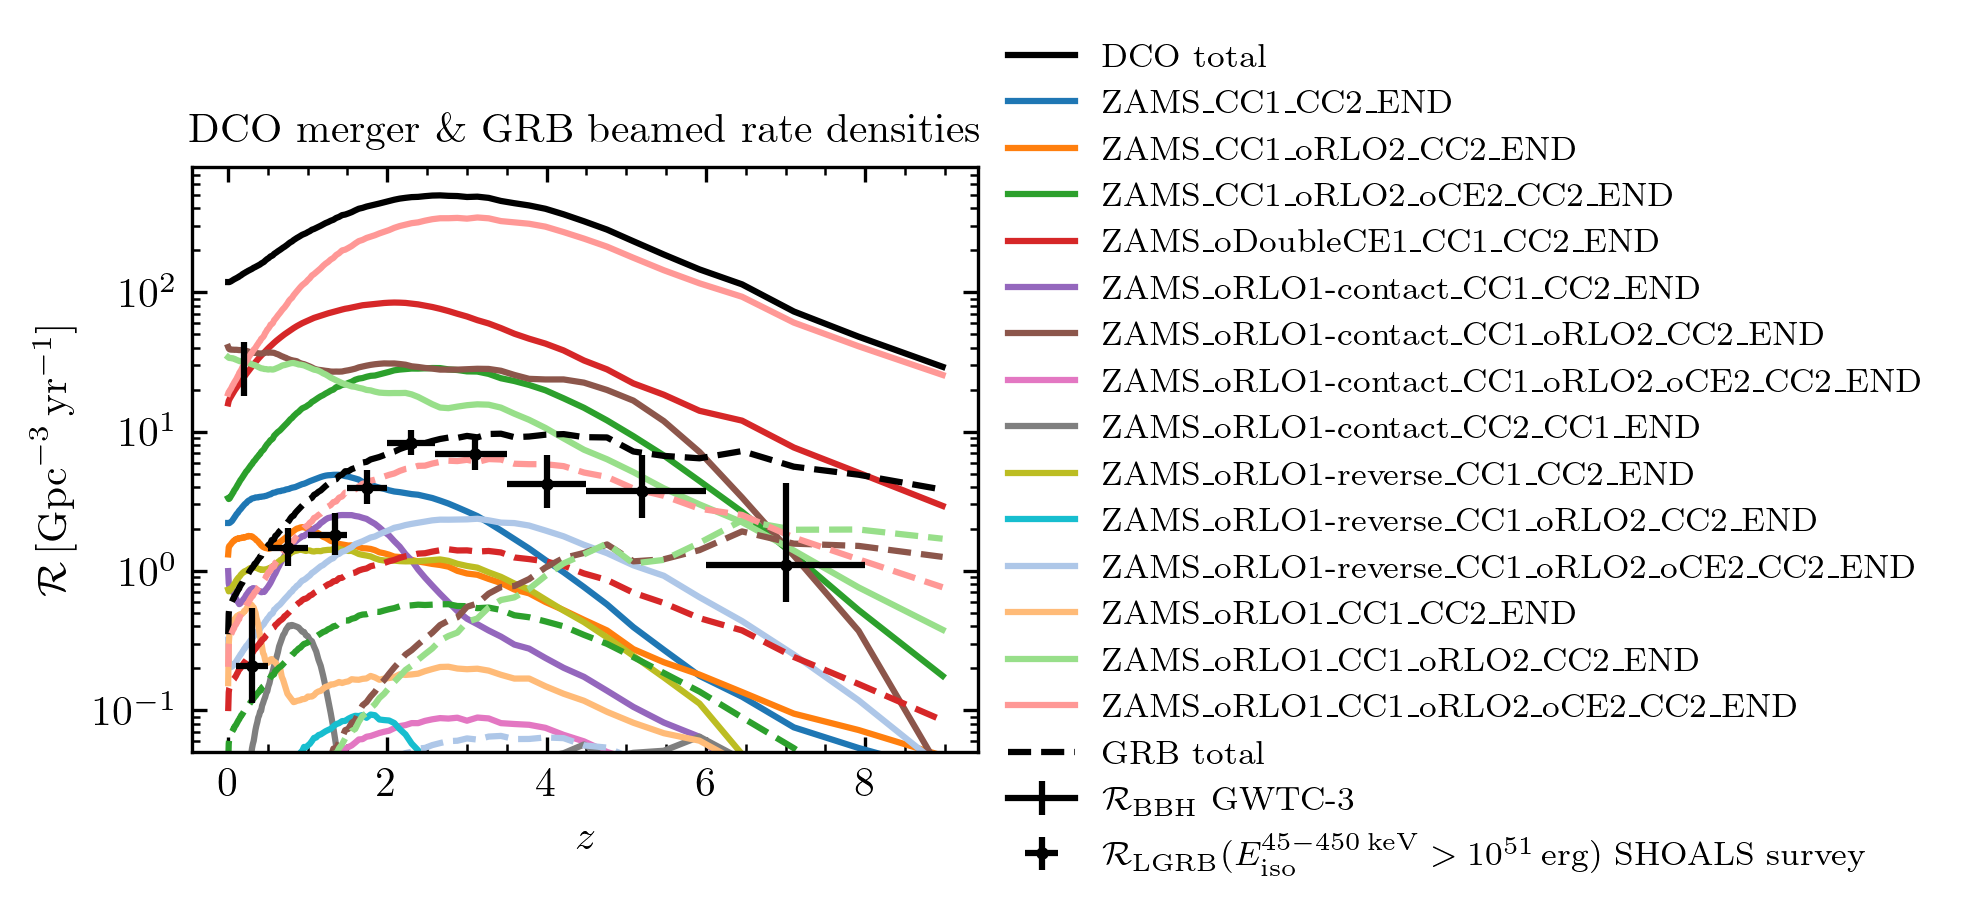

In [5]:
kwargs = dict(ylim=(0.05,800), zmax=10., show=True, path=None, channels=True,
              GWTC3=True, Perley16=True, grb_components=False)
pop.plot_rate_density(DCO=True, GRB=True, **kwargs)

Similar to the DCO case, we can use the `plot_hist_properties` method to display the intrinsic and observable (beamed) distribution of the LGRB population.

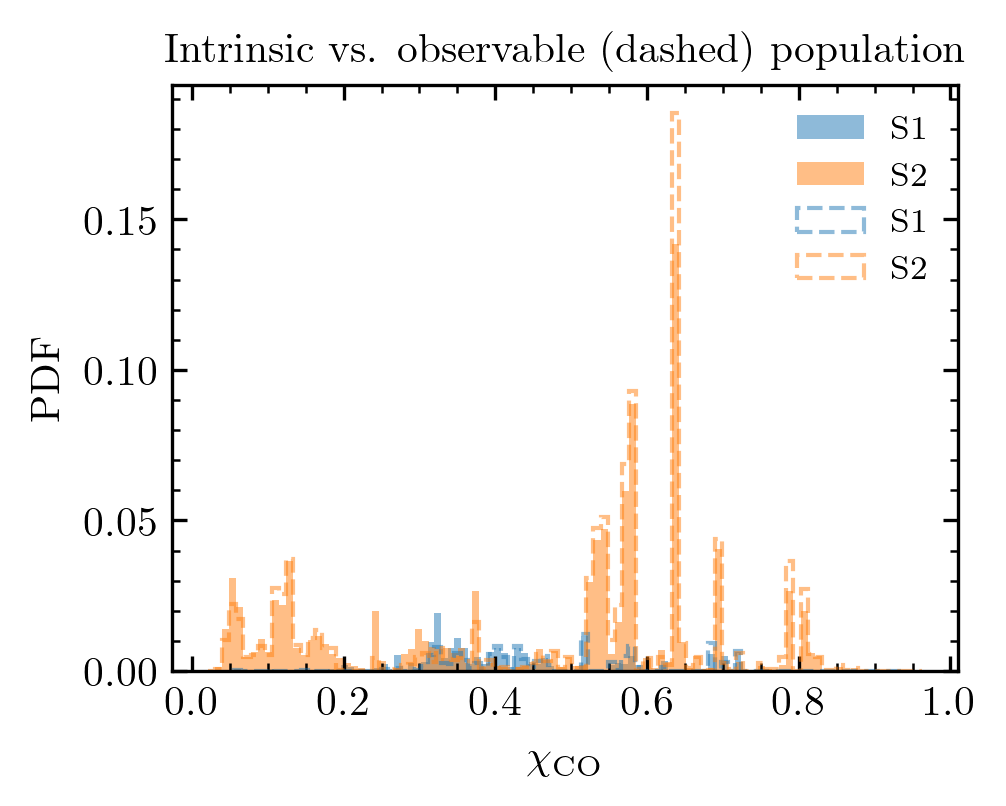

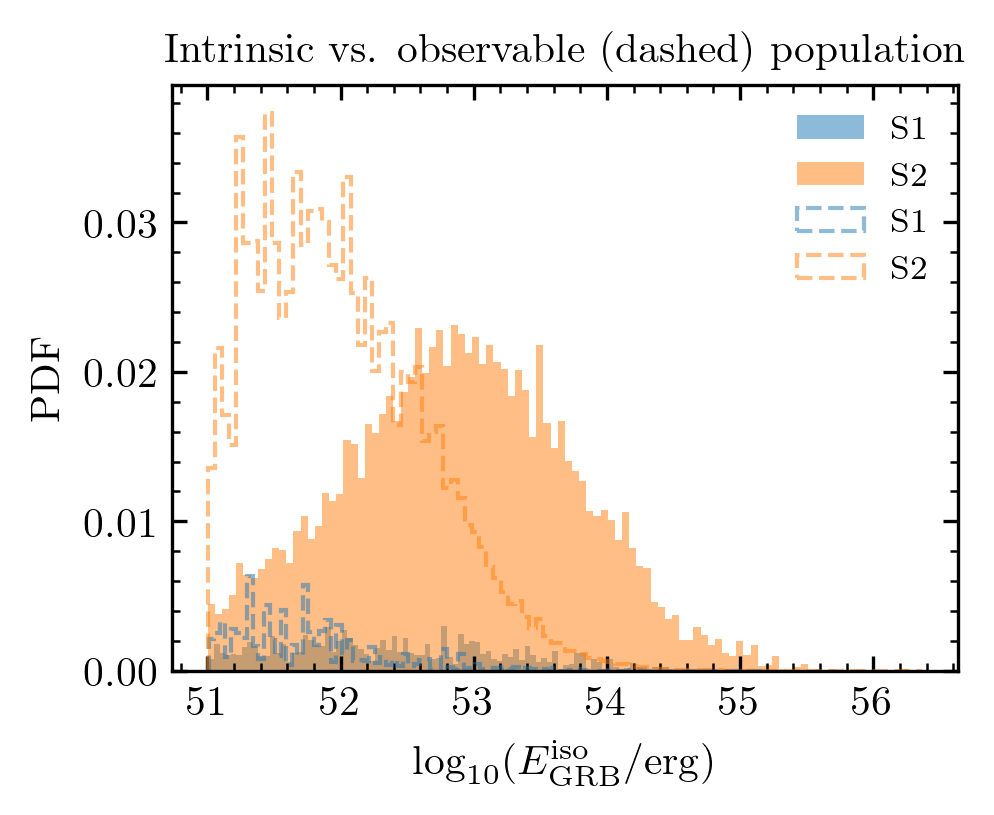

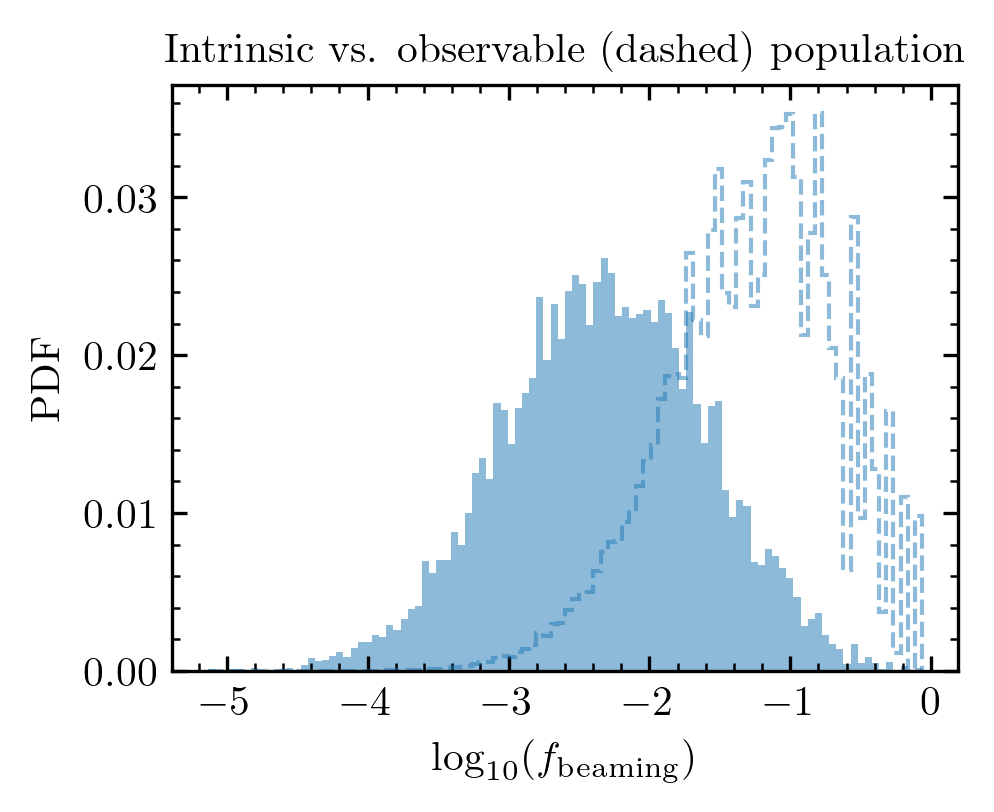

In [6]:
kwargs = dict(bins=100, xlog=False)
pop.plot_hist_properties(['S1_spin','S2_spin'], intrinsic=True, observable=True, pop='GRB', **kwargs)
kwargs = dict(bins=100, xlog=True)
pop.plot_hist_properties(['S1_E_GRB_iso','S2_E_GRB_iso'], intrinsic=True, observable=True, pop='GRB', **kwargs)
pop.plot_hist_properties('S2_f_beaming', intrinsic=True, observable=True, pop='GRB', **kwargs)